# BCRT / CRT-2 — Camera-Ready Analyses (All-in-One)
This notebook presents the validation analyses. Each section first shows **naïve-only data**, then **full dataset**.
Tables accompany figures, and brief summaries of significant findings are given.

## 1. IRT (2PL) and Test Information Functions (TIF)
First, we compare CRT-2 against BCRT (Core-3 and Core-4).
We plot Item Characteristic Curves (ICC) and Item Information Curves (IIC), followed by Test Information Functions (TIFs).

**Naïve-only sample first, then full dataset.**

In [1]:
# Auto-detect project base
from pathlib import Path

def find_base(start=Path('.').resolve()):
    p = start
    for _ in range(6):
        if (p/'config'/'config.yaml').exists() and (p/'src').exists():
            break
        p = p.parent
    BASE = p
    TABLES = BASE / 'reports' / 'tables'
    FIGS_2PL = BASE / 'reports' / 'figures' / 'irt2pl'
    FIGS_DEC = BASE / 'reports' / 'figures' / 'bcrt_decision'
    print('BASE:', BASE)
    return BASE, TABLES, FIGS_2PL, FIGS_DEC

BASE, TABLES, FIGS_2PL, FIGS_DEC = find_base()


BASE: /Users/sionmarcanthony/Desktop/phd/bcrt_analysis/bcrt-validation-fixed-v6


In [2]:
import pandas as pd, numpy as np
from IPython.display import display, Image

per_item = pd.read_csv(TABLES / 'per_item_stats.csv')
irt_bcrt = pd.read_csv(TABLES / 'irt2pl_bcrt.csv')
irt_crt2 = pd.read_csv(TABLES / 'irt2pl_crt2.csv')
reliab = pd.read_csv(TABLES / 'reliability.csv', dtype={'k':int}, low_memory=False)
person = pd.read_csv(BASE / 'data' / 'processed' / 'person_with_liwc.csv')

bcrt = per_item[per_item['family']=='BCRT'].rename(columns={'item':'item_id'}).merge(irt_bcrt[['item_id','a_hat','b_hat']], on='item_id', how='left').sort_values('item_id')
display(bcrt[['item_id','p_unseen','r_itemrest_bcrt','r_itemrest_comb','r_itemrest_crt2','pct_intuitive_errors','a_hat','b_hat']].round(3))


,item_id,p_unseen,r_itemrest_bcrt,r_itemrest_comb,r_itemrest_crt2,pct_intuitive_errors,a_hat,b_hat
0,bcrt_q1,0.419,0.044,0.135,0.206,0.258,0.747,0.287
1,bcrt_q2,0.656,0.144,0.299,0.385,0.250,0.806,-0.930
2,bcrt_q3,0.315,0.434,0.469,0.379,0.500,0.971,0.394
3,bcrt_q4,0.129,0.247,0.288,0.257,0.333,1.117,1.358
4,bcrt_q5,0.320,0.104,0.187,0.233,0.395,0.680,0.660
5,bcrt_q6,0.440,0.352,0.315,0.201,0.429,0.652,0.109


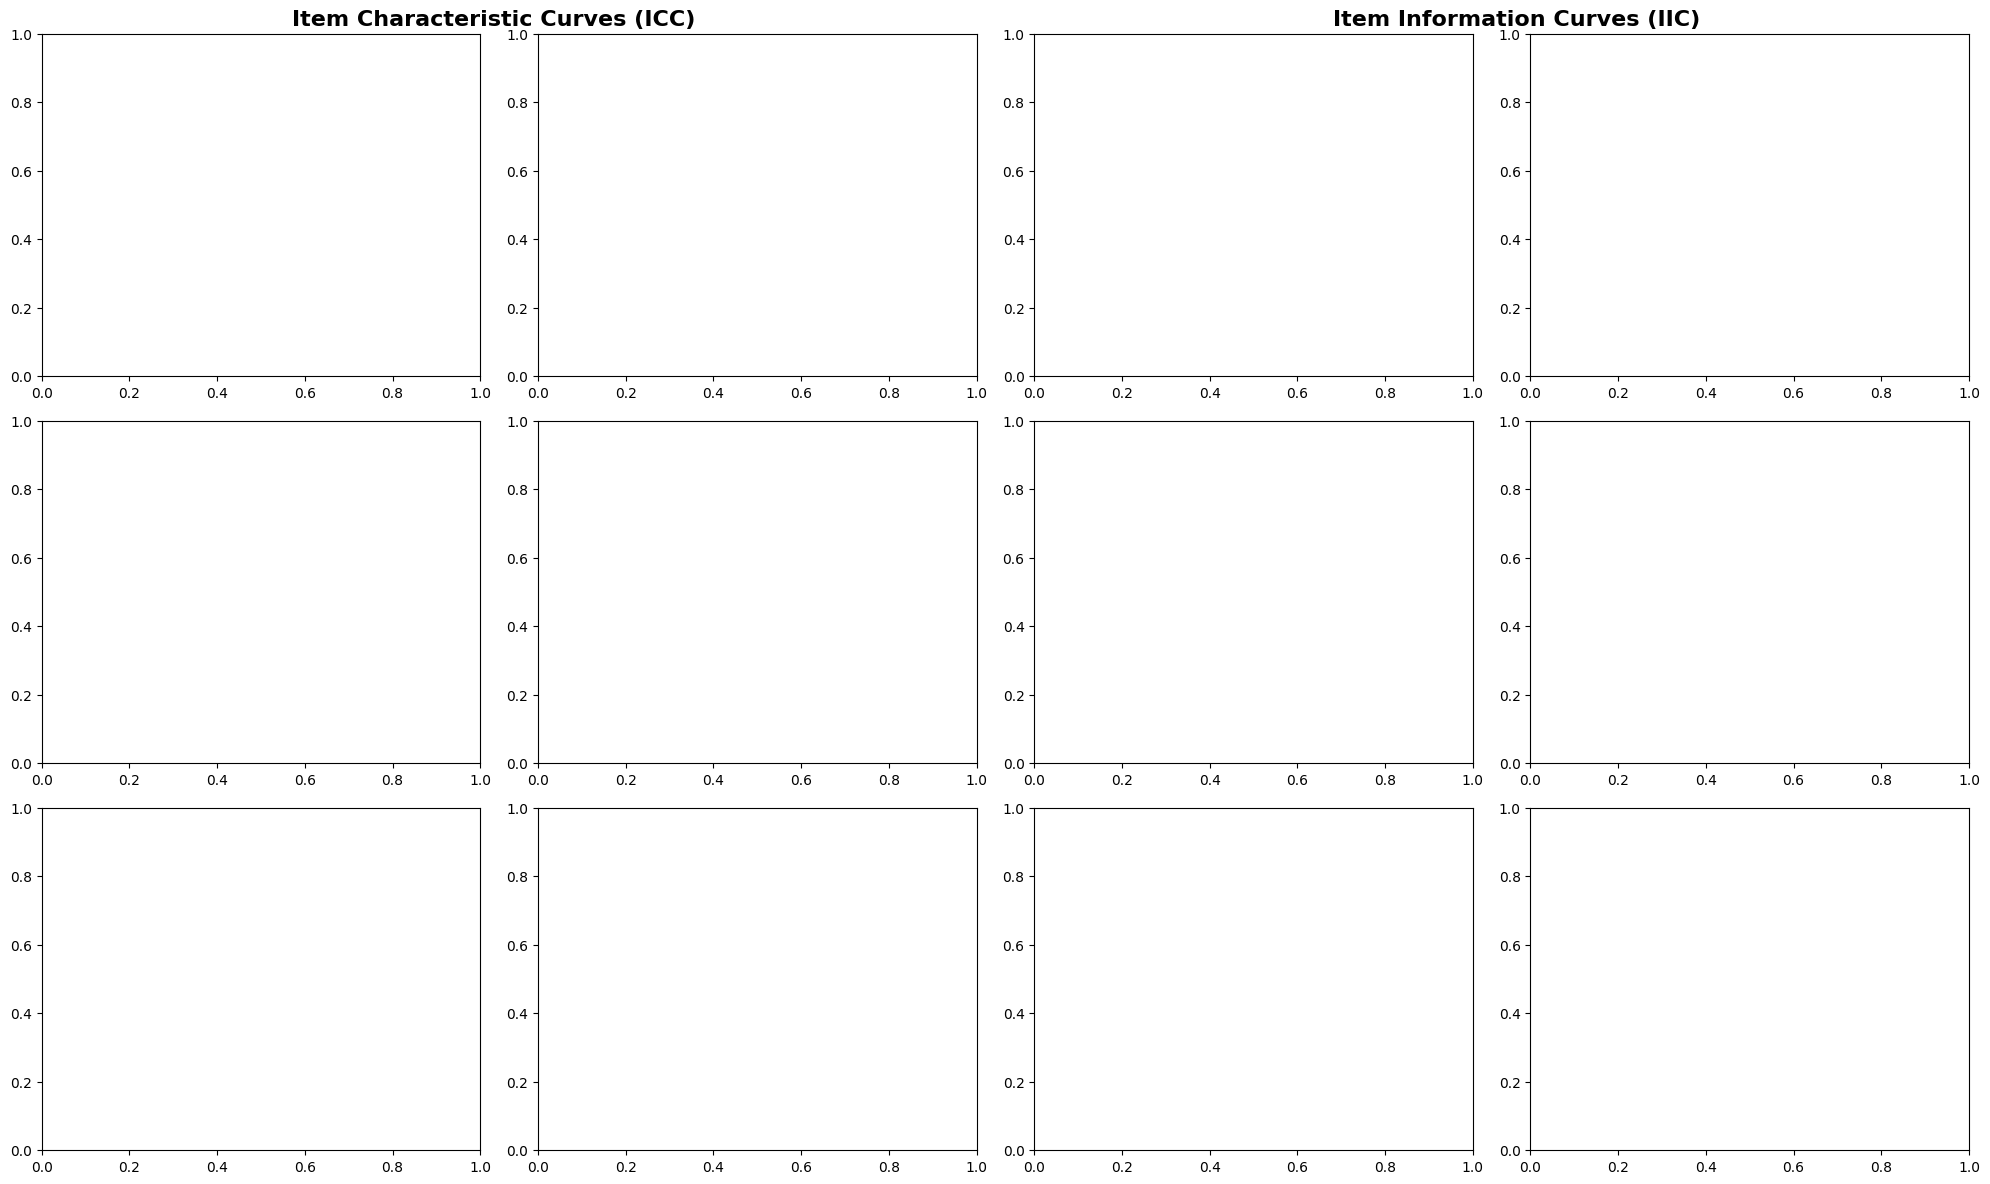

In [3]:
# Show ICC/IIC curves for BCRT
import matplotlib.pyplot as plt
from IPython.display import display

# Create two panels: one for ICC, one for IIC
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

# ICC panel
ax1.set_title('Item Characteristic Curves (ICC)', fontsize=16, fontweight='bold')
ax1.axis('off')

# IIC panel  
ax2.set_title('Item Information Curves (IIC)', fontsize=16, fontweight='bold')
ax2.axis('off')

# Create subplots within each panel (3x2 grid for 6 items)
icc_axes = []
iic_axes = []

for i in range(6):
    row = i // 2
    col = i % 2
    
    # ICC subplot
    icc_ax = fig.add_subplot(3, 4, 2*i + 1)
    icc_axes.append(icc_ax)
    
    # IIC subplot
    iic_ax = fig.add_subplot(3, 4, 2*i + 2)
    iic_axes.append(iic_ax)

# Load and display images
items = sorted(bcrt['item_id'])
for i, item in enumerate(items):
    if i < 6:  # Only show first 6 items
        # ICC
        icc_path = FIGS_2PL / f'icc_{item}_bcrt.png'
        if icc_path.exists():
            img = plt.imread(str(icc_path))
            icc_axes[i].imshow(img)
            icc_axes[i].set_title(f'{item} ICC', fontsize=10)
            icc_axes[i].axis('off')
        
        # IIC
        iic_path = FIGS_2PL / f'iic_{item}_bcrt.png'
        if iic_path.exists():
            img = plt.imread(str(iic_path))
            iic_axes[i].imshow(img)
            iic_axes[i].set_title(f'{item} IIC', fontsize=10)
            iic_axes[i].axis('off')

plt.tight_layout()
plt.show()


,item_id,n,p_correct,beta0,beta1,se_beta0,se_beta1,a_hat,b_hat
0,crt2_q1,240,0.704167,1.208977,1.400200,0.186211,0.224253,0.823647,-0.863432
1,crt2_q2,240,0.741667,1.244987,0.925586,0.172750,0.190592,0.544463,-1.345079
2,crt2_q3,240,0.829167,2.101437,1.394624,0.252535,0.262620,0.820367,-1.506812
3,crt2_q4,240,0.170833,-2.479778,1.894094,0.304842,0.284983,1.114173,1.309216


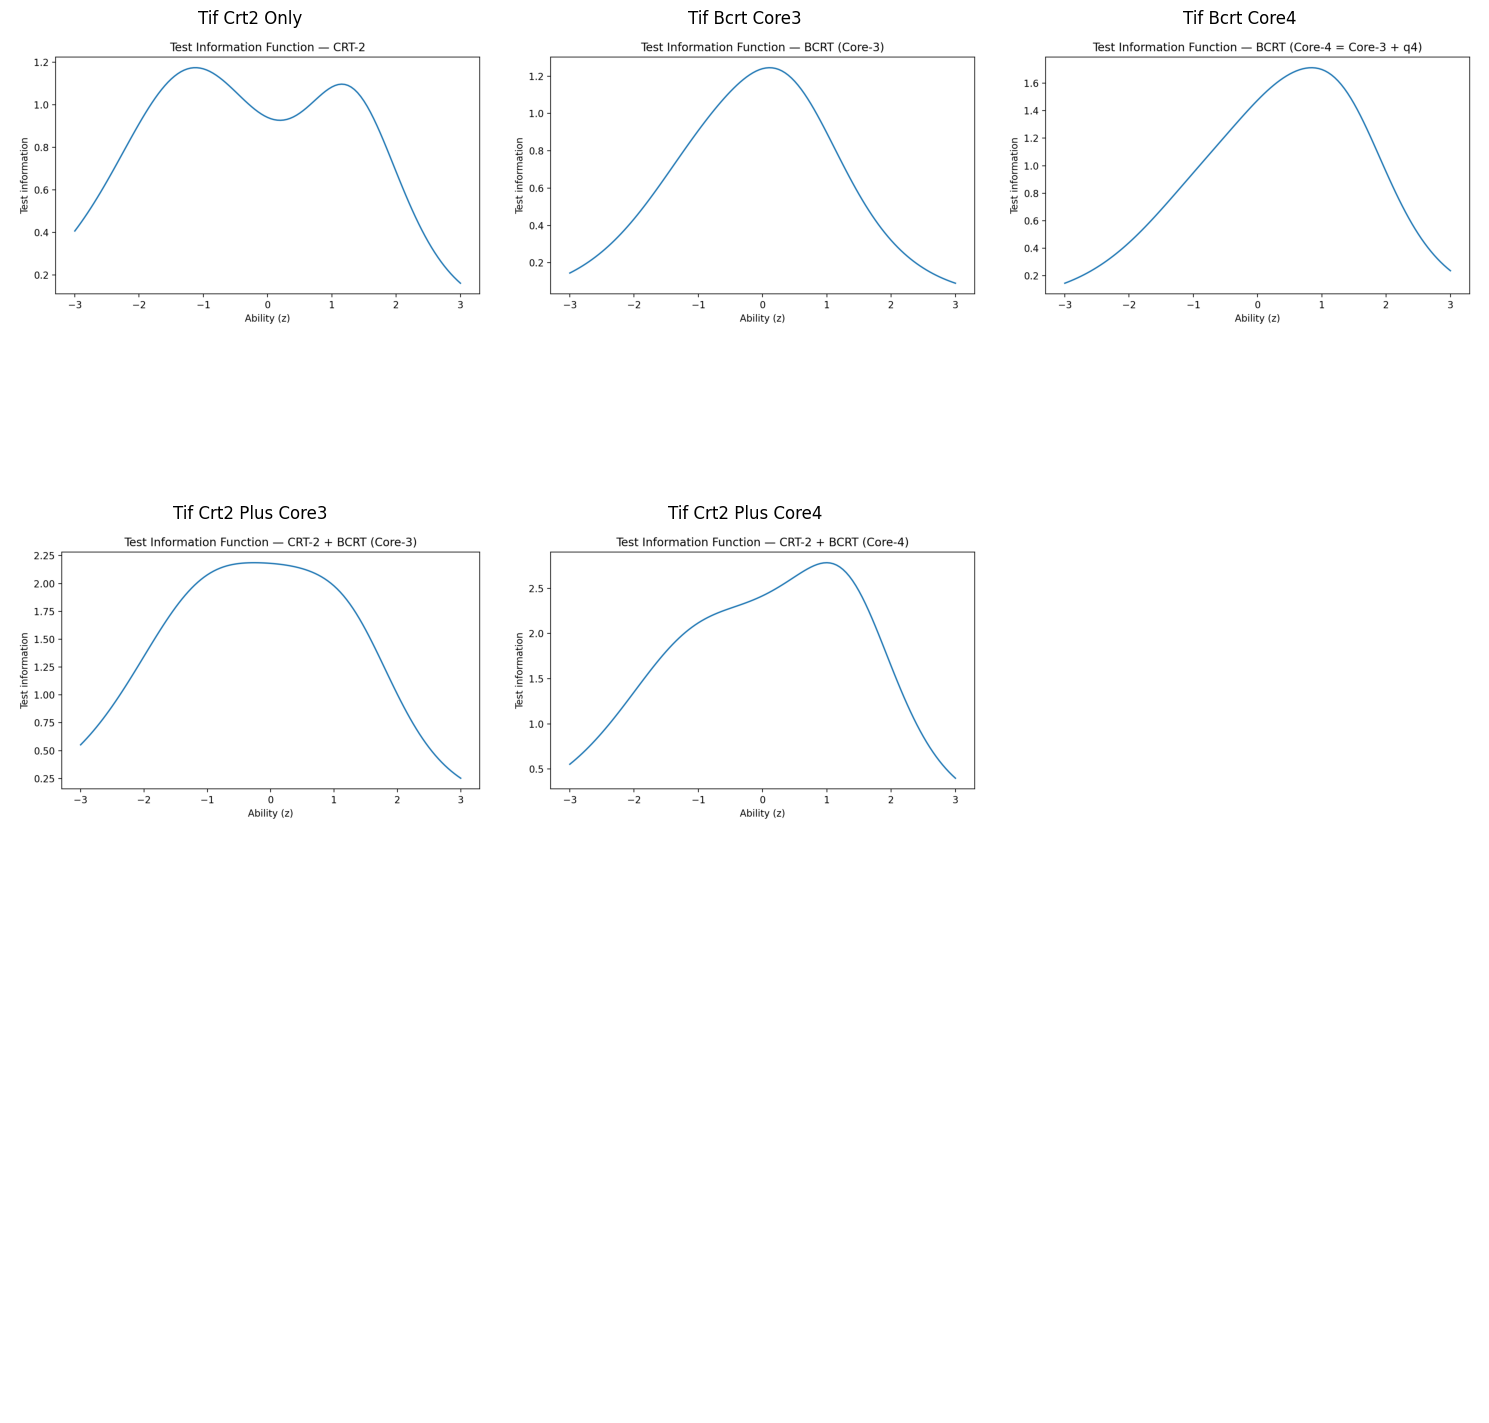

In [4]:
from IPython.display import Image, display
import matplotlib.pyplot as plt

display(irt_crt2)

# Create a 3x3 subplot to show 9 figure panels
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# TIFs
compare_dir = BASE / 'reports' / 'figures' / 'tif_compare'
tif_names = ['tif_crt2_only','tif_bcrt_core3','tif_bcrt_core4','tif_crt2_plus_core3','tif_crt2_plus_core4']

plot_idx = 0
for name in tif_names:
    p = compare_dir / f'{name}.png'
    if p.exists() and plot_idx < 9:
        img = plt.imread(str(p))
        axes[plot_idx].imshow(img)
        axes[plot_idx].set_title(name.replace('_', ' ').title())
        axes[plot_idx].axis('off')
        plot_idx += 1

# # Also show CRT2-only TIF
# p = FIGS_2PL / 'tif_crt2.png'
# if p.exists() and plot_idx < 9:
#     img = plt.imread(str(p))
#     axes[plot_idx].imshow(img)
#     axes[plot_idx].set_title('TIF CRT2')
#     axes[plot_idx].axis('off')
#     plot_idx += 1

# Hide any unused subplots
for i in range(plot_idx, 9):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


**Summary:**
- TIF for CRT-2 shows a bimodal information curve.
- Adding Core-3 or Core-4 broadens coverage across ability levels.
- Naïve vs full: shapes similar, but full dataset is smoother.

## 2. Reliability and NFC Correlations
We examine KR-20 reliability coefficients and correlations between CRT-2, BCRT, combined, and NFC.

**Naïve-only first, then full dataset.**

In [5]:
display(reliab)
corr = pd.read_csv(TABLES / 'correlations_totals.csv', index_col=0)
display(corr.round(3))


,sample,label,k,n,KR20,KR20_lo,KR20_hi,Delta_from_base
0,full,CRT-2,4,240,0.415842,0.292257,0.517020,NaN
1,full,BCRT-6,6,240,0.542995,0.433953,0.627781,NaN
2,full,Combined-10,10,240,0.595930,0.506971,0.660188,NaN
3,full,BCRT-4,4,240,0.505073,0.383732,0.591245,NaN
4,full,Combined-8,8,240,0.560573,0.463645,0.632261,NaN
5,full,Combined-10 minus crt2_q1,9,240,0.574363,NaN,NaN,-0.021567
6,full,Combined-10 minus crt2_q2,9,240,0.603621,NaN,NaN,0.007691
7,full,Combined-10 minus crt2_q3,9,240,0.584419,NaN,NaN,-0.011511
8,full,Combined-10 minus crt2_q4,9,240,0.545422,NaN,NaN,-0.050509
9,full,Combined-10 minus bcrt_q1,9,240,0.568056,NaN,NaN,-0.027874


,crt2_total,bcrt6_total,combined10_total,NFC_total
crt2_total,1.000,0.296,0.703,0.128
bcrt6_total,0.296,1.000,0.888,-0.067
combined10_total,0.703,0.888,1.000,0.012
NFC_total,0.128,-0.067,0.012,1.000


**Summary:**
- Reliability improves when BCRT items are added.
- CRT-2 alone has lower KR-20, BCRT core-4/6 higher.
- NFC correlations are weak/negative, consistent across samples.

## 3. LIWC Analyses of Writing Tasks - Naive Only
We test whether CRT-2 and BCRT scores predict LIWC features in written answers.
Analyses are grouped by LIWC families (Summary, Quantity/Length, Function/Analytic, Cognitive Complexity, Tone/Affect).

We show effect-size heatmaps (β_std), significance markers, and tables of significant regressions.

**Naïve-only first, then full dataset.**

/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_84396/949576800.py:15: FutureWarning: The provided callable <function nanmean at 0x1075437e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


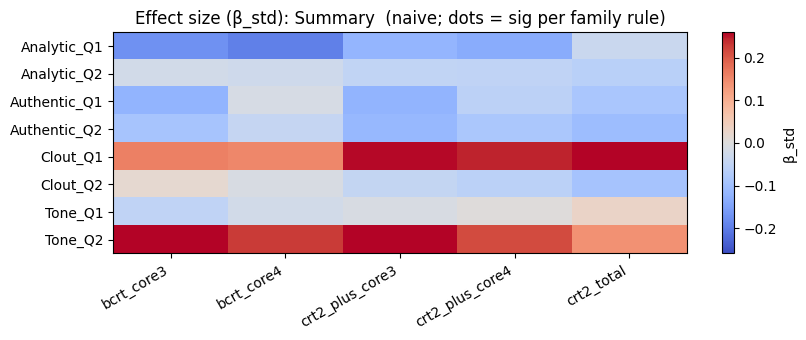

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_84396/949576800.py:15: FutureWarning: The provided callable <function nanmean at 0x1075437e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


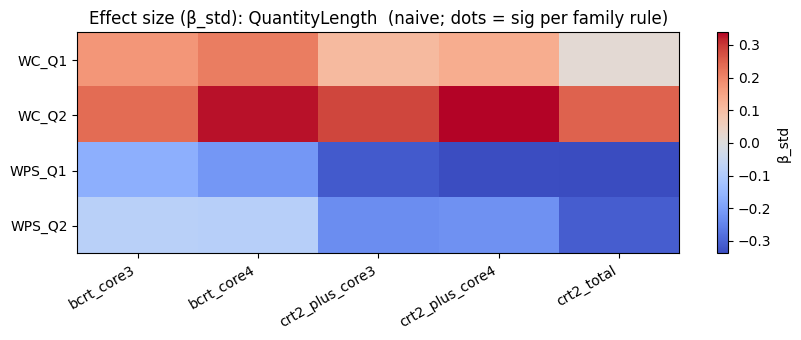

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_84396/949576800.py:15: FutureWarning: The provided callable <function nanmean at 0x1075437e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


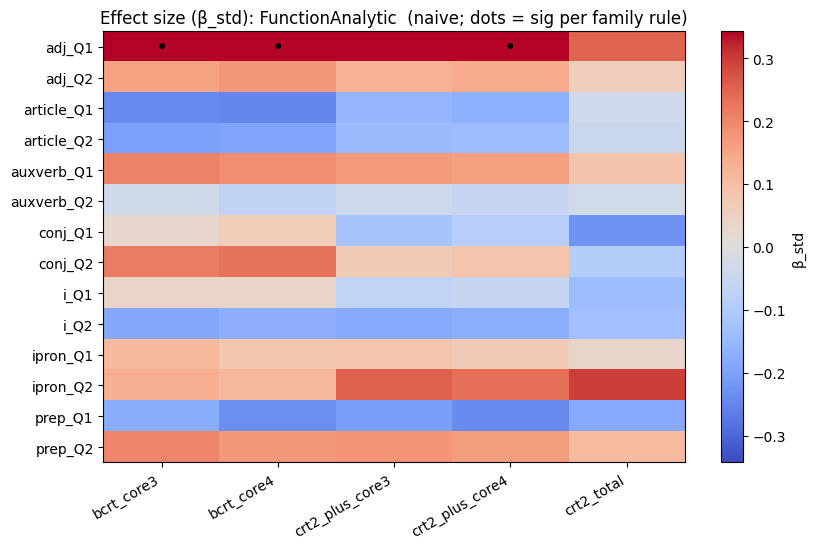

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n
61,FunctionAnalytic,adj_Q1,bcrt_core3,bcrt_core3_total,0.767874,0.270104,1.265644,0.411932,0.002498,0.034976,0.166614,51
62,FunctionAnalytic,adj_Q1,bcrt_core4,bcrt_core4_total,0.808990,0.368957,1.249023,0.491101,0.000314,0.004397,0.237361,51
64,FunctionAnalytic,adj_Q1,crt2_plus_core4,crt2_plus_core4_total,0.424336,0.154245,0.694426,0.430322,0.002075,0.029045,0.186442,51


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_84396/949576800.py:15: FutureWarning: The provided callable <function nanmean at 0x1075437e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


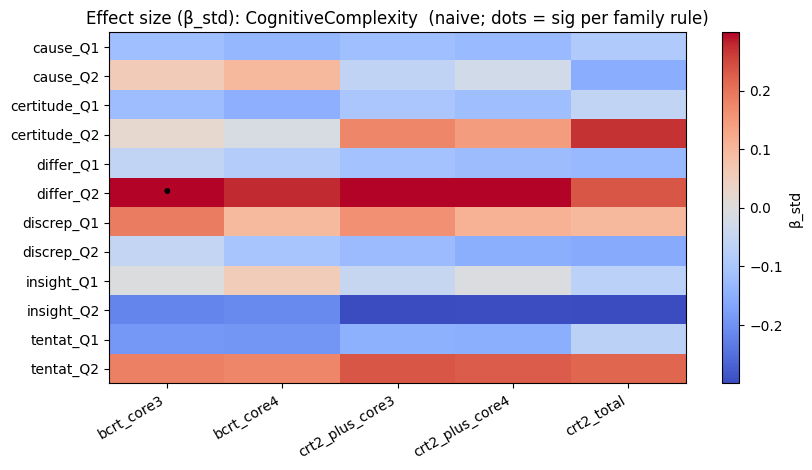

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n
156,CognitiveComplexity,differ_Q2,bcrt_core3,bcrt_core3_total,0.913897,0.297904,1.52989,0.341554,0.003639,0.043666,0.116659,52


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_84396/949576800.py:15: FutureWarning: The provided callable <function nanmean at 0x1075437e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


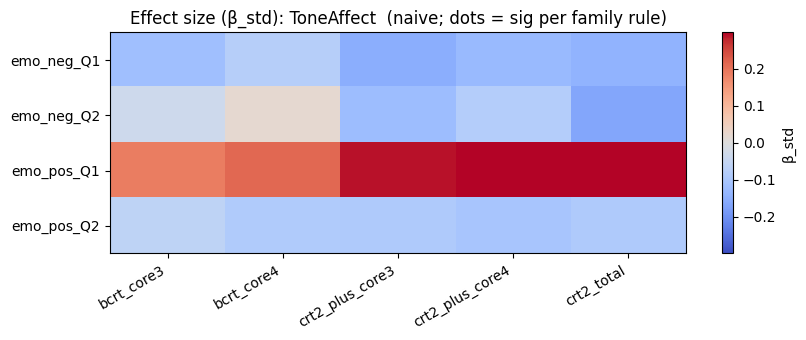

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_84396/949576800.py:15: FutureWarning: The provided callable <function nanmean at 0x1075437e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


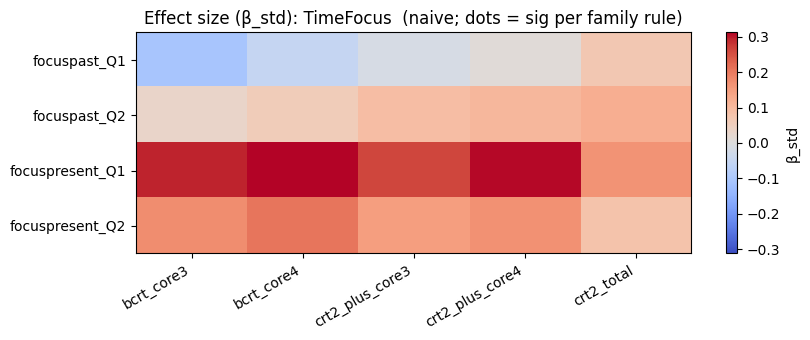

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_84396/949576800.py:15: FutureWarning: The provided callable <function nanmean at 0x1075437e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


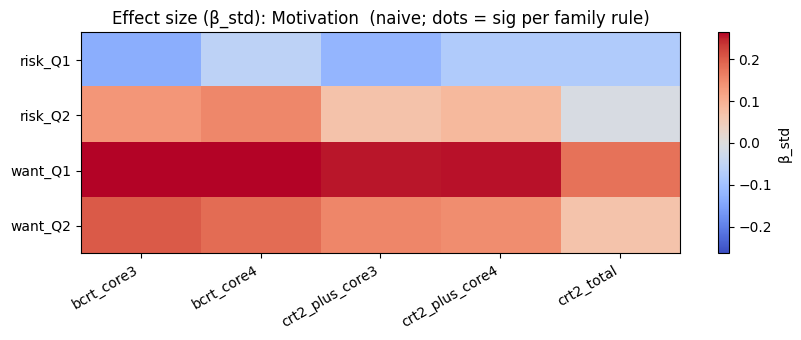

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n


In [6]:
# Per-family heatmaps (p and beta_std) + companion significance table
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from IPython.display import display
DATASET = "naive"   # change to "naive" to view naïve results

df = pd.read_csv(TABLES / f'liwc_predict_families_{DATASET}.csv')

def show_family(fam):
    g = df[df['family']==fam].copy()
    # collapse over predictor term within set by min p
    pv = g.pivot_table(index='outcome', columns='set', values='p_raw', aggfunc='min')
    neglogp = -np.log10(pv.replace(0, np.nextafter(0,1)))
    sig = g.groupby(['outcome','set'])['sig_adj'].max().unstack('set').reindex_like(pv).fillna(False)
    # effect size: average beta_std per (outcome,set)
    bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)

    # # Heat 1: -log10(p_raw) - IF you want sig heatmap
    # fig = plt.figure(figsize=(8.5, max(3.5, 0.4*len(neglogp.index))))
    # plt.imshow(neglogp.values, aspect='auto')
    # plt.xticks(range(neglogp.shape[1]), neglogp.columns, rotation=30, ha='right')
    # plt.yticks(range(neglogp.shape[0]), neglogp.index)
    # plt.colorbar(label='-log10(p_raw)')
    # plt.title(f"LIWC family: {fam}  ({DATASET}; dots = sig per family rule)")
    # for i in range(sig.shape[0]):
    #     for j in range(sig.shape[1]):
    #         if bool(sig.iloc[i, j]): plt.text(j, i, '•', ha='center', va='center', fontsize=12, fontweight='bold')
    # plt.tight_layout(); plt.show()

    # Heat 2: beta_std (signed magnitude)
    fig = plt.figure(figsize=(8.5, max(3.5, 0.4*len(bsv.index))))
    vmax = np.nanpercentile(np.abs(bsv.values), 95)
    plt.imshow(bsv.values, aspect='auto', vmin=-vmax, vmax=vmax, cmap='coolwarm')
    plt.xticks(range(bsv.shape[1]), bsv.columns, rotation=30, ha='right')
    plt.yticks(range(bsv.shape[0]), bsv.index)
    plt.colorbar(label='β_std')
    plt.title(f"Effect size (β_std): {fam}  ({DATASET}; dots = sig per family rule)")
    for i in range(sig.shape[0]):
        for j in range(sig.shape[1]):
            if bool(sig.iloc[i, j]): plt.text(j, i, '•', ha='center', va='center', fontsize=12, fontweight='bold')
    plt.tight_layout(); plt.show()

    # Table: significant rows with CI
    sig_rows = g[g['sig_adj']].copy().sort_values(['outcome','set'])
    sig_rows = sig_rows[['family','outcome','set','predictor','beta','ci_lo','ci_hi','beta_std','p_raw','p_adj','r2','n']]
    display(sig_rows.head(50))  # edit as needed

for fam in df['family'].unique():
    show_family(fam)

/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_84396/1724617140.py:12: FutureWarning: The provided callable <function nanmean at 0x1075437e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


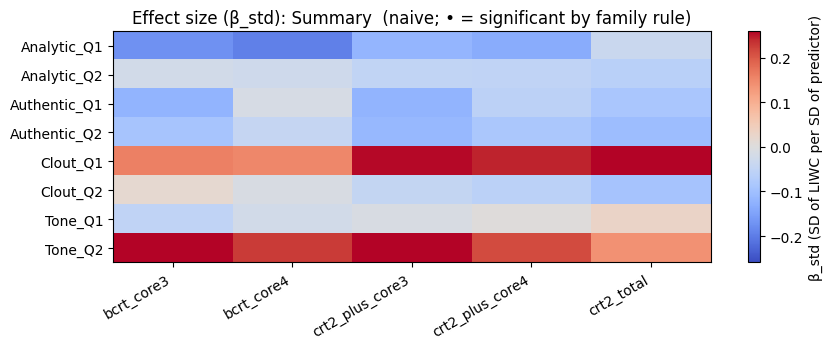

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_84396/1724617140.py:12: FutureWarning: The provided callable <function nanmean at 0x1075437e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


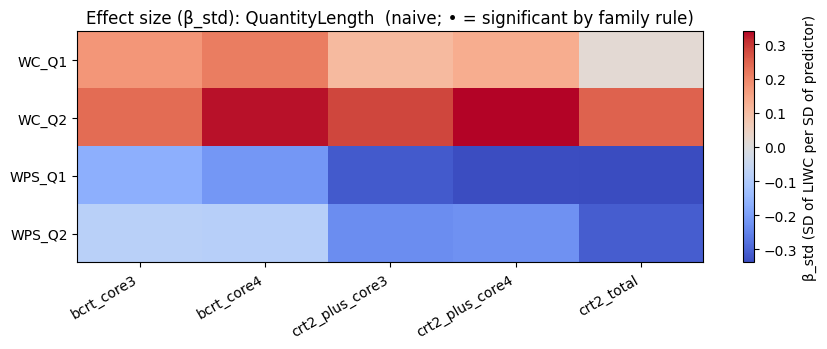

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_84396/1724617140.py:12: FutureWarning: The provided callable <function nanmean at 0x1075437e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


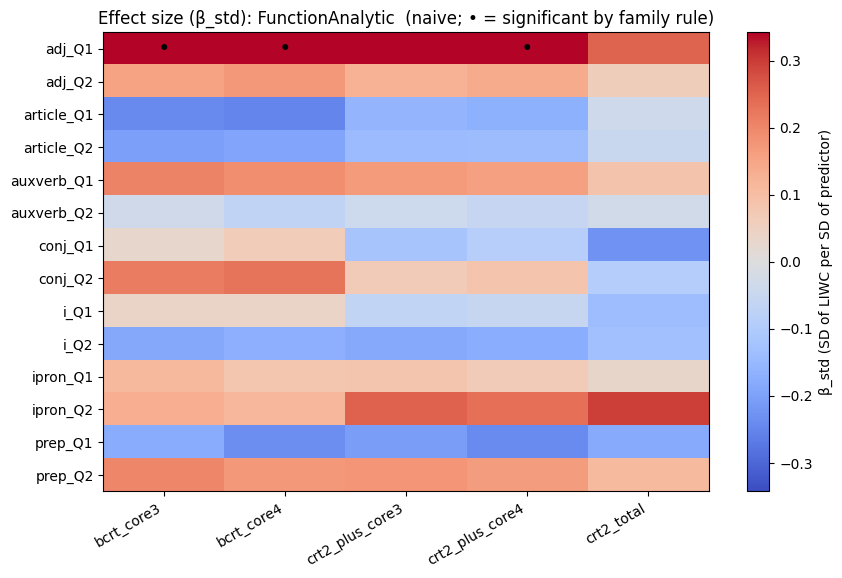

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n
61,FunctionAnalytic,adj_Q1,bcrt_core3,bcrt_core3_total,0.767874,0.270104,1.265644,0.411932,0.002498,0.034976,0.166614,51
62,FunctionAnalytic,adj_Q1,bcrt_core4,bcrt_core4_total,0.808990,0.368957,1.249023,0.491101,0.000314,0.004397,0.237361,51
64,FunctionAnalytic,adj_Q1,crt2_plus_core4,crt2_plus_core4_total,0.424336,0.154245,0.694426,0.430322,0.002075,0.029045,0.186442,51


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_84396/1724617140.py:12: FutureWarning: The provided callable <function nanmean at 0x1075437e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


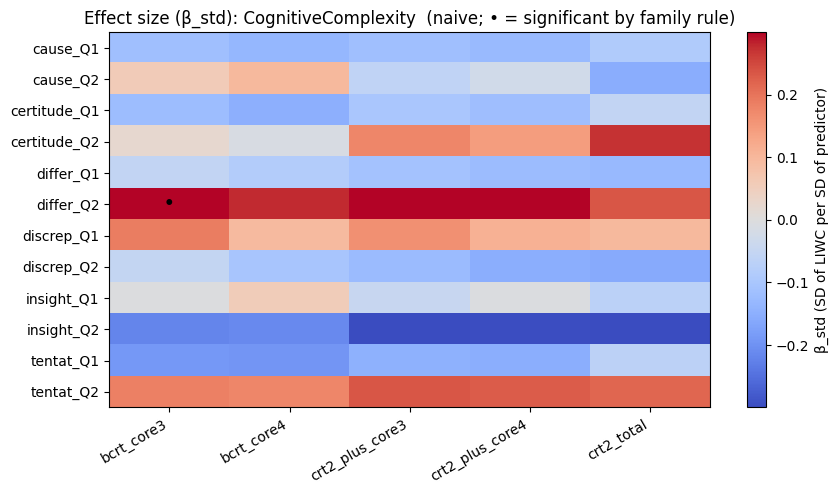

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n
156,CognitiveComplexity,differ_Q2,bcrt_core3,bcrt_core3_total,0.913897,0.297904,1.52989,0.341554,0.003639,0.043666,0.116659,52


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_84396/1724617140.py:12: FutureWarning: The provided callable <function nanmean at 0x1075437e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


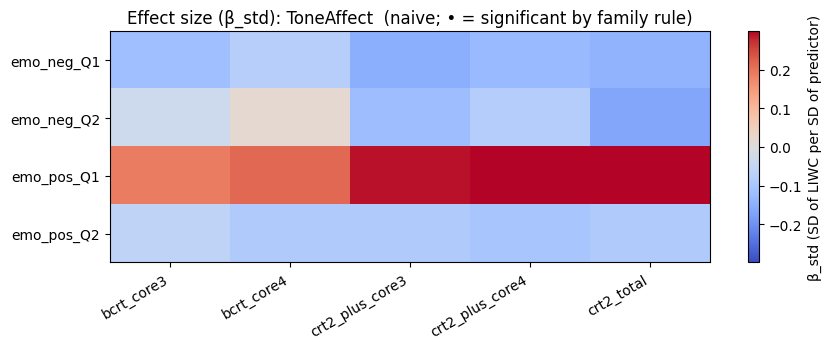

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_84396/1724617140.py:12: FutureWarning: The provided callable <function nanmean at 0x1075437e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


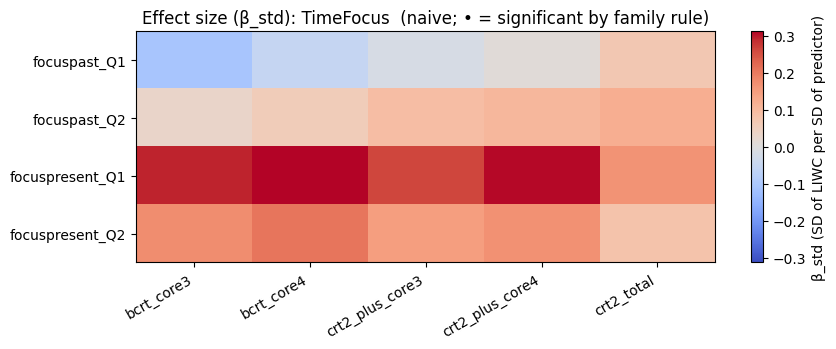

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n


/var/folders/z5/906x0vzj5n3f66twf2fv8p940000gn/T/ipykernel_84396/1724617140.py:12: FutureWarning: The provided callable <function nanmean at 0x1075437e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)


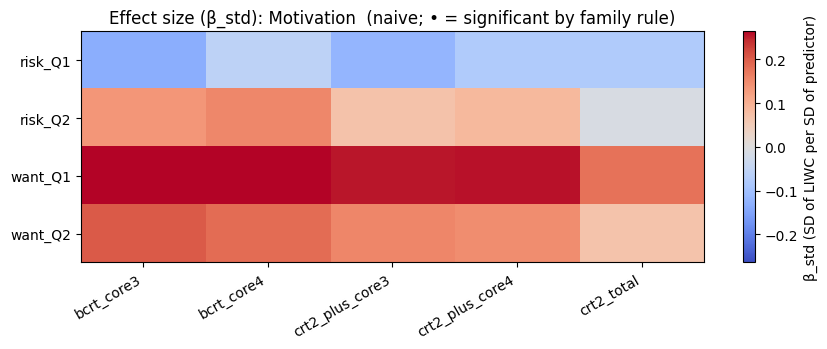

,family,outcome,set,predictor,beta,ci_lo,ci_hi,beta_std,p_raw,p_adj,r2,n


In [7]:
# Effect-size heatmaps (β_std) with adj-sig markers + companion table - EFFECT SIZE ONLY ONES
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from IPython.display import display

DATASET = "naive"   # change to "naive" for naïve-only results
df = pd.read_csv(TABLES / f'liwc_predict_families_{DATASET}.csv')

def show_family(fam):
    g = df[df['family']==fam].copy()

    # Effect size matrix (average β_std per (outcome,set))
    bsv = g.pivot_table(index='outcome', columns='set', values='beta_std', aggfunc=np.nanmean)

    # Significance mask (adj: FDR for Summary/QuantityLength, raw p<.05 for others)
    sig = g.groupby(['outcome','set'])['sig_adj'].max().unstack('set').reindex_like(bsv).fillna(False)

    # β_std heatmap
    fig = plt.figure(figsize=(8.8, max(3.6, 0.42*len(bsv.index))))
    vmax = np.nanpercentile(np.abs(bsv.values), 95)
    plt.imshow(bsv.values, aspect='auto', vmin=-vmax, vmax=vmax, cmap='coolwarm')
    plt.xticks(range(bsv.shape[1]), bsv.columns, rotation=30, ha='right')
    plt.yticks(range(bsv.shape[0]), bsv.index)
    plt.colorbar(label='β_std (SD of LIWC per SD of predictor)')
    plt.title(f"Effect size (β_std): {fam}  ({DATASET}; • = significant by family rule)")
    for i in range(sig.shape[0]):
        for j in range(sig.shape[1]):
            if bool(sig.iloc[i, j]): plt.text(j, i, '•', ha='center', va='center', fontsize=12, fontweight='bold')
    plt.tight_layout(); plt.show()

    # Companion table: only the significant rows, with CI and raw/adj p
    tab = g[g['sig_adj']].copy().sort_values(['outcome','set','predictor'])
    tab = tab[['family','outcome','set','predictor','beta','ci_lo','ci_hi','beta_std','p_raw','p_adj','r2','n']]
    display(tab.head(100))  # bump if you want more

for fam in df['family'].unique():
    show_family(fam)

**Summary:**
- Significant associations appear for Authenticity, Clout, Number words, etc.
- Effects differ somewhat between naïve and full datasets, but consistent patterns emerge.
- Core-4 often shows stronger associations than CRT-2 alone.

## 4. Extended LIWC & NFC Analyses
Using the corrected NFC scoring (9 forward, 9 reverse), we re-test correlations and LIWC regressions.

**Naïve-only first, then full dataset.**

In [8]:
# NFC_total in processed files is now corrected (reverse-scored per key).
# Show the correlations again (corrected NFC):
import pandas as pd
corr = pd.read_csv(TABLES / 'correlations_totals.csv', index_col=0)
display(corr.round(3))

# Extended LIWC regressions (summary + cognitive/analytic family):
ext_all = pd.read_csv(TABLES / 'liwc_predict_writing_extended.csv')
ext_sig = pd.read_csv(TABLES / 'liwc_predict_writing_extended_sig_only.csv')
display(ext_sig.head(30))  # sig-only preview

from IPython.display import Image, display
p = BASE / 'reports' / 'figures' / 'liwc_predict_heatmap_extended.png'
if p.exists(): display(Image(filename=str(p)))


,crt2_total,bcrt6_total,combined10_total,NFC_total
crt2_total,1.000,0.296,0.703,0.128
bcrt6_total,0.296,1.000,0.888,-0.067
combined10_total,0.703,0.888,1.000,0.012
NFC_total,0.128,-0.067,0.012,1.000


FileNotFoundError: [Errno 2] No such file or directory: '/Users/sionmarcanthony/Desktop/phd/bcrt_analysis/bcrt-validation-fixed-v6/reports/tables/liwc_predict_writing_extended.csv'

**Summary:**
- Corrected NFC scoring confirms weak correlations with CRT/BCRT.
- LIWC associations remain largely unchanged after correction.